# Table FFT
`ubermagtable` has the functionality to Fourier transform table data. This can be useful for trying to look at phenomena such as ferromagnetic resonance.  

To give an example of the Fourier transform functionality, a system with a single macrospin has been created. This system has the initial magnetisation along the $x$ direction with an external magnetic field applied along the $z$ direction. We can then use a time driver to evolve the state with a dynamics equation which includes precession and damping. The following code is used to generate data (using the full range of packages available in Ubermag):

```python
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

# Define a macrospin mesh (i.e. one discretisation cell).
p1 = (0, 0, 0)  # first point of the mesh domain (m)
p2 = (1e-9, 1e-9, 1e-9)  # second point of the mesh domain (m)
n = (1, 1, 1)  # discretisation cell size (m)

Ms = 8e6  # magnetisation saturation (A/m)
H = (0, 0, 2e6)  # external magnetic field (A/m)
gamma0 = 2.211e5  # gyromagnetic ratio (m/As)
alpha = 0.1  # Gilbert damping

region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, n=n)

system = mm.System(name='macrospin')
system.energy = mm.Zeeman(H=H)
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)
system.m = df.Field(mesh, dim=3, value=(1, 0, 0), norm=Ms)

td = mc.TimeDriver()
td.drive(system, t=0.1e-9, n=200)
```

However, `ubermagtable` can be used indepentently of most other packages in Ubermag. Therefore, in this example we assume that we already have an `odt` file that we can load from disk using only `ubermagtable`. (When using the full range of Ubermag packages this is generally done automatically in the background and the table made available as `system.table`).

In [1]:
import os

import numpy as np

import ubermagtable

There is a pre-computed file under `./macrospin/drive-0/macrospin.odt` (obtained with the code shown above):

In [2]:
odtfile = os.path.join(".", "macrospin", "drive-0", "macrospin.odt")
table = ubermagtable.Table.fromfile(odtfile, x="t")

In [3]:
table.data

,E,E_calc_count,max_dm/dt,dE/dt,delta_E,E_zeeman,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,-4.400762e-22,37.0,25204.415522,-8.798712e-10,-3.269612e-22,-4.400762e-22,6.0,6.0,0.0,0.975901,0.217115,0.021888,3.715017e-13,5.000000e-13
1,-8.797309e-22,44.0,25186.311578,-8.786077e-10,-4.396547e-22,-8.797309e-22,8.0,1.0,1.0,0.904810,0.423562,0.043754,5.000000e-13,1.000000e-12
2,-1.318544e-21,51.0,25156.186455,-8.765071e-10,-4.388134e-22,-1.318544e-21,10.0,1.0,2.0,0.790286,0.609218,0.065579,5.000000e-13,1.500000e-12
3,-1.756100e-21,58.0,25114.112032,-8.735776e-10,-4.375555e-22,-1.756100e-21,12.0,1.0,3.0,0.638055,0.765021,0.087341,5.000000e-13,2.000000e-12
4,-2.191985e-21,65.0,25060.188355,-8.698302e-10,-4.358857e-22,-2.191985e-21,14.0,1.0,4.0,0.455710,0.883427,0.109020,5.000000e-13,2.500000e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-2.009865e-20,1402.0,690.438568,-6.602614e-13,-3.374608e-25,-2.009865e-20,396.0,1.0,195.0,0.013011,-0.024099,0.999625,5.000000e-13,9.800000e-11
196,-2.009897e-20,1409.0,675.493807,-6.319876e-13,-3.230101e-25,-2.009897e-20,398.0,1.0,196.0,0.017545,-0.020251,0.999641,5.000000e-13,9.850000e-11
197,-2.009928e-20,1416.0,660.872303,-6.049242e-13,-3.091780e-25,-2.009928e-20,400.0,1.0,197.0,0.021059,-0.015612,0.999656,5.000000e-13,9.900000e-11
198,-2.009958e-20,1423.0,646.567078,-5.790193e-13,-2.959381e-25,-2.009958e-20,402.0,1.0,198.0,0.023428,-0.010435,0.999671,5.000000e-13,9.950000e-11


We can examine the time evolution of the components of the magnetisation.

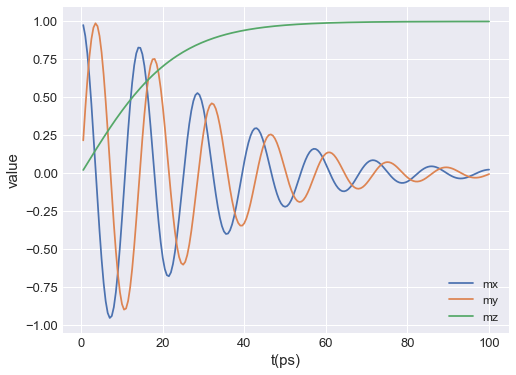

In [4]:
# NBVAL_IGNORE_OUTPUT
table.mpl(y=["mx", "my", "mz"])

We can use `rfft` to take the real Fourier transform of the table and return a new `ubermag.table` object. A list of dependent variables can be provided to the function and only these columns will be transformed. If not list is provided then every column is Fourier transformed. At the moment the units of `rfft` are only correct when the independent variable is time.

In [5]:
fft_table = table.rfft(y=["mx", "my", "mz"])
fft_table

                f               ft_mx               ft_my  \
0    0.000000e+00 -0.521315+0.000000j  4.487159+0.000000j   
1    1.000000e+10 -0.543484+0.663425j  4.585720+0.150552j   
2    2.000000e+10 -0.616125+1.426352j  4.912330+0.322464j   
3    3.000000e+10 -0.759313+2.452269j  5.590649+0.544779j   
4    4.000000e+10 -0.989438+4.140613j  6.995293+0.839505j   
..            ...                 ...                 ...   
96   9.600000e+11  0.487614-0.030294j  0.055860-0.006899j   
97   9.700000e+11  0.487593-0.022707j  0.055952-0.005171j   
98   9.800000e+11  0.487579-0.015131j  0.056017-0.003446j   
99   9.900000e+11  0.487570-0.007564j  0.056056-0.001722j   
100  1.000000e+12  0.487567+0.000000j  0.056069+0.000000j   

                    ft_mz  
0    168.841749+0.000000j  
1   -18.166086+16.032844j  
2    -7.088546+13.908290j  
3    -3.313478+10.167120j  
4   -1.9890680+7.7393600j  
..                    ...  
96  -0.4943940+0.0307590j  
97  -0.4943850+0.0230560j  
98  -0.4943780+

As the data is a complex number we can use `apply` to apply a function to each of the values. In this case using `np.abs` means we can plot the result as it is a real number.

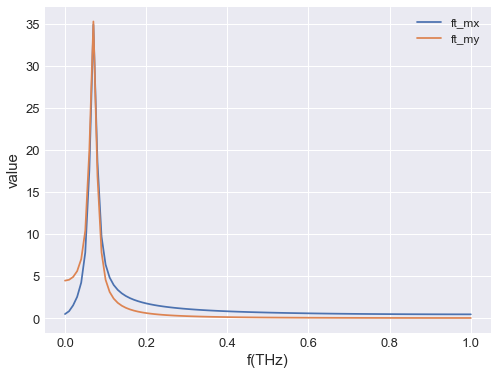

In [6]:
# NBVAL_IGNORE_OUTPUT
fft_table.apply(np.abs).mpl(y=["ft_mx", "ft_my"])

An inverse real Fourier transform functionality is also implemented `irfft`.

In [7]:
ifft_table = fft_table.irfft()
ifft_table

                t        mx        my        mz
0    5.000000e-13  0.975901  0.217115  0.021888
1    1.000000e-12  0.904810  0.423562  0.043754
2    1.500000e-12  0.790286  0.609218  0.065579
3    2.000000e-12  0.638055  0.765021  0.087341
4    2.500000e-12  0.455710  0.883427  0.109020
..            ...       ...       ...       ...
195  9.800000e-11  0.013011 -0.024099  0.999625
196  9.850000e-11  0.017545 -0.020251  0.999641
197  9.900000e-11  0.021059 -0.015612  0.999656
198  9.950000e-11  0.023428 -0.010435  0.999671
199  1.000000e-10  0.024591 -0.004988  0.999685

[200 rows x 4 columns]

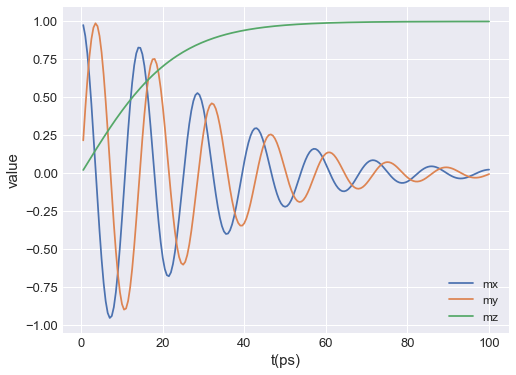

In [8]:
# NBVAL_IGNORE_OUTPUT
ifft_table.mpl(y=["mx", "my", "mz"])